In [1]:
import pandas as pd
from pandas_datareader import data
# Lets us read stock data
import matplotlib.pyplot as plt
# plt is the community convention alias for pyplot
# code below just allows the visualizations to appear in jupyter notebook instead of a new window, not important
%matplotlib inline

# Visualization Intro (section 13.167):

- Bar Graphs, Pie Charts, Histograms, etc

# Use the .plot() method to render a line chart (section 13.168):

- We're using blackberry's stock price for this example

In [20]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2021-09-30")
# ^ importing stock data is covered in the 'Inputs and Outputs' section
bb.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-28,10.08,9.77,9.99,9.79,8733300.0,9.79
2021-09-29,9.93,9.56,9.83,9.60,6505000.0,9.60
2021-09-30,9.98,9.47,9.62,9.73,9487600.0,9.73


<AxesSubplot:xlabel='Date'>

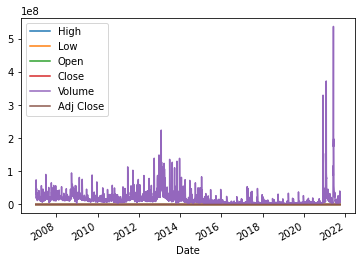

In [21]:
bb.plot()
# pandas tries to plot every numeric column
# We only see volumn column because the values are so much higher than the rest of the columns

<AxesSubplot:xlabel='Date'>

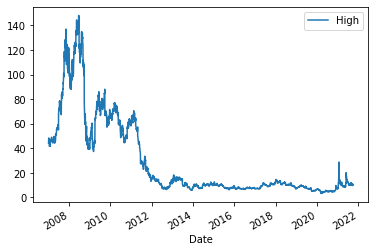

In [26]:
# How to target a specific column (keeps the dates, specifies what goes on the y-axis):

# Option 1:
bb.plot(y = "High")

<AxesSubplot:xlabel='Date'>

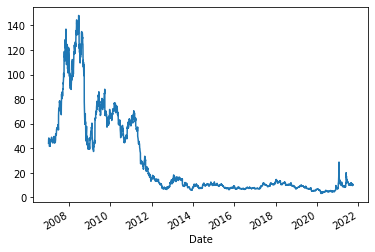

In [27]:
# Option 2:
bb["High"].plot()

<AxesSubplot:xlabel='Date'>

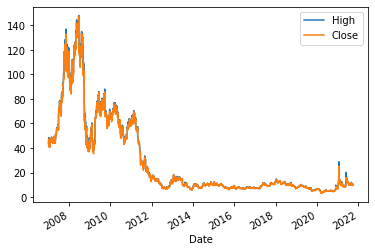

In [29]:
# How to show two or more columns, but not all of them:

bb[["High", "Close"]].plot()

# Modifying Plot Aesthetics with matplotlib Templates (section 13.169):

- matplotlib allows you to manually customize pretty much everything about each output, not all shown in this course

In [30]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2021-09-30")
bb.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-28,10.08,9.77,9.99,9.79,8733300.0,9.79
2021-09-29,9.93,9.56,9.83,9.60,6505000.0,9.60
2021-09-30,9.98,9.47,9.62,9.73,9487600.0,9.73


In [31]:
plt.style.available
# ^ returns a list of strings of templates (color groupings)

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:xlabel='Date'>

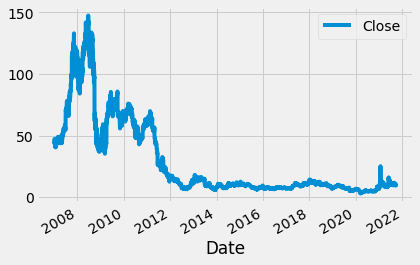

In [32]:
plt.style.use("fivethirtyeight")
# .use() expects a single argument of string of one of the available templates (listed above)
bb.plot(y = "Close")

<AxesSubplot:xlabel='Date'>

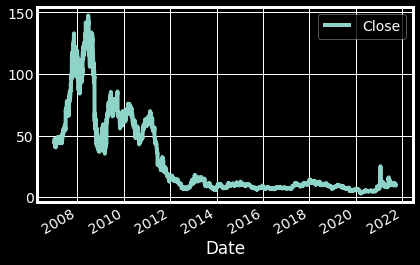

In [34]:
# trying another style: 

plt.style.use("dark_background")
bb.plot(y = "Close")

<AxesSubplot:xlabel='Date'>

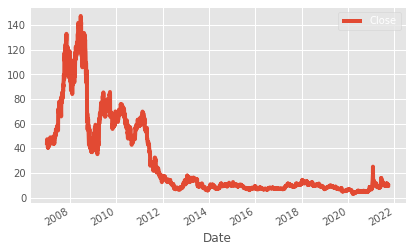

In [35]:
# trying another style: 

plt.style.use("ggplot")
# when changing the style, it applies it globally, can always set it within each cell or set to a variable
bb.plot(y = "Close")

# Creating Bar Graphs to Show Counts (section 13.170):

In [36]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2021-09-30")
bb.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-28,10.08,9.77,9.99,9.79,8733300.0,9.79
2021-09-29,9.93,9.56,9.83,9.60,6505000.0,9.60
2021-09-30,9.98,9.47,9.62,9.73,9487600.0,9.73


In [38]:
def rank_performance(stock_price):
    if stock_price <= 10:
        return "Poor"
    elif stock_price <= 50:
        return "Adequate"
    else:
        return "Stellar"

<AxesSubplot:>

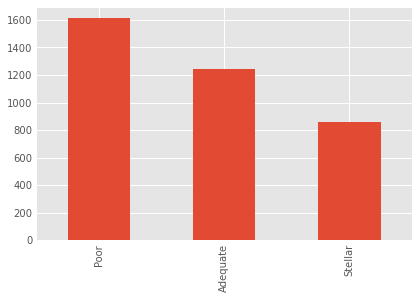

In [43]:
bb["Close"].apply(rank_performance).value_counts().plot(kind = "bar")
# the 'kind' parameter defaults to 'line'

<AxesSubplot:>

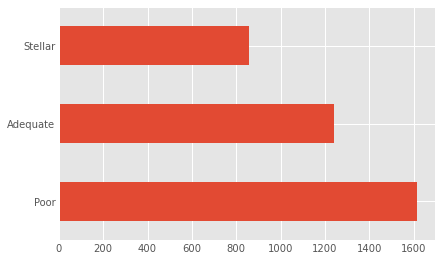

In [44]:
# barh: h stands for horizontal:

bb["Close"].apply(rank_performance).value_counts().plot(kind = "barh")

# Creating Pie Charts to Represent Proportions (section 13.171):

In [46]:
bb = data.DataReader(name = "BB", data_source = "yahoo", start = "2007-01-01", end = "2021-09-30")
bb.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-28,10.08,9.77,9.99,9.79,8733300.0,9.79
2021-09-29,9.93,9.56,9.83,9.60,6505000.0,9.60
2021-09-30,9.98,9.47,9.62,9.73,9487600.0,9.73


In [47]:
bb["Close"].mean()

28.50422121269376

<AxesSubplot:ylabel='Close'>

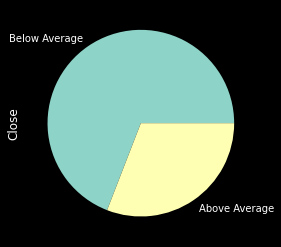

In [50]:
def performance_rank(stock_price):
    if stock_price >= bb["Close"].mean():
        return "Above Average"
    else:
        return "Below Average"

plt.style.use("dark_background")    
bb["Close"].apply(performance_rank).value_counts().plot(kind = "pie")
# some styles might not have lables

<AxesSubplot:ylabel='Close'>

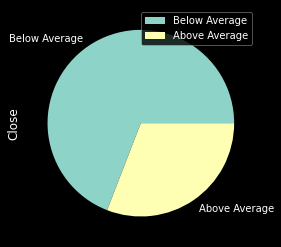

In [51]:
bb["Close"].apply(performance_rank).value_counts().plot(kind = "pie", legend = True)